In [228]:
# IMPORT STATEMENTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [93]:
# SAVE KAPRSAC JET FUEL PRICES IN A DATAFRAME
df_org = pd.read_csv("data-sources/KARPSAC-jetfuelprices-2010to2020.csv", sep=";") # original data set
df = df_org.copy() 

In [94]:
# PRELIMINARY STATS:
df.describe()

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
count,7626.000000
mean,1.407106
std,0.897850
min,0.282000
25%,0.581000
50%,1.199000
75%,2.007750
max,4.814000


In [95]:
# CLEAN UP DATA TO PERFORM GROUPBY ANALYSIS
df['YEAR'] = df['Date'].astype(str).str[0:4]
# df = df[df['YEAR'].astype(int) >= 2010] # filters only years from 2010 to 2020
df['MONTH'] = df['Date'].astype(str).str[5:7]
df['DAY'] = df['Date'].astype(str).str[8:10]
del df['Date']

In [96]:
#CHANGE NUMERICAL MONTH TO MONTHS
month_lookup = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
                '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October',
                '11': 'November','12': 'December'}

In [97]:
df['MONTH'] = df['MONTH'].apply(lambda x: month_lookup[x])

In [98]:
df['MONTH YEAR'] = df['MONTH'] + ' ' +  df['YEAR']
df.set_index('MONTH YEAR')

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,DAY
MONTH YEAR,,,,
August 2004,1.250,2004,August,22
August 2004,1.207,2004,August,05
August 2004,1.208,2004,August,01
July 2004,1.190,2004,July,28
July 2004,1.128,2004,July,14
...,...,...,...,...
September 2012,3.218,2012,September,05
August 2012,3.225,2012,August,26
August 2012,3.162,2012,August,19


In [99]:
# FIND MEAN OF THESE PRICES
jet_fuel = df.groupby(['MONTH YEAR']).mean()

In [100]:
# IMPORT BTS DOMESTICS DATA DEPARTURES PERFORMED
dom_flight = pd.read_csv('data-sources/USCarrier_Traffic_DOM.csv', sep='","', engine='python', skiprows=1)
dom_flight.drop(dom_flight.tail(1).index,inplace=True) # drop last column

In [101]:
# RENAME COLUMNS
dom_flight.index.name = 'Period'
dom_flight.rename(columns={'Unit: (000)': 'Total(DOM)'}, inplace=True)

In [102]:
# CLEANUP DATA
dom_flight['PERIOD'] = dom_flight.index
dom_flight['PERIOD'] = dom_flight['PERIOD'].astype(str).str[1:]
dom_flight.set_index('PERIOD')
dom_flight['Total(DOM)'] = dom_flight['Total(DOM)'].astype(str).str[:-1]

In [103]:
dom_flight.set_index('PERIOD', inplace=True)

In [104]:
dom_flight.head()

,Total(DOM)
PERIOD,
January 2000,623794
February 2000,605936
March 2000,667027
April 2000,635767
May 2000,672835


In [105]:
# IMPORT BTS INTERNATIONAL DATA DEPARTURES PERFORMED
intl_flight = pd.read_csv('data-sources/USCarrier_Traffic_INTL.csv', sep='","', engine='python', skiprows=1)
intl_flight.drop(intl_flight.tail(1).index,inplace=True)

In [106]:
# RENAME COLUMNS
intl_flight.index.name = 'Period'
intl_flight.rename(columns={'Unit: (000)': 'Total(INTL)'}, inplace=True)

In [107]:
# CLEANUP DATA
intl_flight['PERIOD'] = intl_flight.index
intl_flight['PERIOD'] = intl_flight['PERIOD'].astype(str).str[1:]
intl_flight.set_index('PERIOD')
intl_flight['Total(INTL)'] = intl_flight['Total(INTL)'].astype(str).str[:-1]

In [108]:
intl_flight.set_index('PERIOD', inplace=True)

In [109]:
intl_flight.head()

,Total(INTL)
PERIOD,
January 2000,51459
February 2000,49157
March 2000,54263
April 2000,52826
May 2000,55358


In [110]:
# CREATE COMBINED FLIGHT DATAFRAME
combined_flight = dom_flight.copy()

In [111]:
combined_flight['Total(INTL)'] = intl_flight['Total(INTL)']

In [112]:
combined_flight['TOTAL'] = combined_flight['Total(DOM)'].astype(int) + combined_flight['Total(INTL)'].astype(int)

In [113]:
combined_flight

,Total(DOM),Total(INTL),TOTAL
PERIOD,,,
January 2000,623794,51459,675253
February 2000,605936,49157,655093
March 2000,667027,54263,721290
April 2000,635767,52826,688593
May 2000,672835,55358,728193
...,...,...,...
December 2019,729109,74909,804018
January 2020,708984,73377,782361
February 2020,668537,67801,736338


In [114]:
# OIL PRICES BY MONTH AND YEAR
oil_prices = df.groupby(['YEAR', 'MONTH']).mean()

In [115]:
oil_prices

U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
YEAR MONTH                                                                                     
1990 April                                              0.540045                               
     August                                             0.800364                               
     December                                           0.803100                               
     July                                               0.538182                               
     June                                               0.493750                               
...                                                          ...                               
2020 January                                            1.769727                               
     July                                               1.056000                               
     June                                               0.989818                               
     March                                              0.940130                               
     May                                                0.704650                               

[364 rows x 1 columns]

In [116]:
# TIME SERIES
import datetime
df_time = pd.read_csv("data-sources/KARPSAC-jetfuelprices-2010to2020.csv", sep=";") # original data set

In [117]:
df_time['Date'] = pd.to_datetime(df_time['Date'])

In [118]:
# df_time = df_time[df_time['Date'].astype(str).str[0:4].astype(int) >= 2010]

In [119]:
df_time

,Date,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
0,2004-08-22 20:00:00-04:00,1.250
1,2004-08-05 20:00:00-04:00,1.207
2,2004-08-01 20:00:00-04:00,1.208
3,2004-07-28 20:00:00-04:00,1.190
4,2004-07-14 20:00:00-04:00,1.128
...,...,...
7621,2012-09-05 20:00:00-04:00,3.218
7622,2012-08-26 20:00:00-04:00,3.225
7623,2012-08-19 20:00:00-04:00,3.162
7624,2012-08-16 20:00:00-04:00,3.163


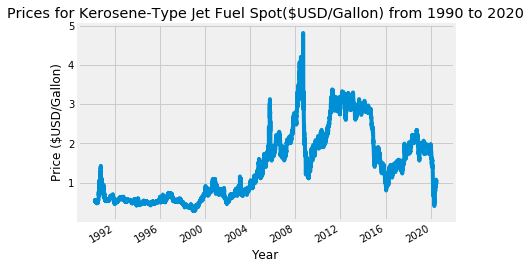

<Figure size 432x288 with 0 Axes>

In [120]:
#PRICE CHANGES 1990 to 2020:
ax = plt.gca()
df_time.plot(kind='line', x='Date', y='U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon', ax=ax)

# FORMATTING:
plt.title('Prices for Kerosene-Type Jet Fuel Spot($USD/Gallon) from 1990 to 2020')
plt.xlabel('Year')
plt.ylabel('Price ($USD/Gallon)')
ax.get_legend().remove()
plt.savefig('price-changes-1990to2020.png', dpi=75, bbox_inches='tight')

plt.show()
plt.draw()

In [121]:
# REFRESHER ON CLEANED DATA
combined_flight

,Total(DOM),Total(INTL),TOTAL
PERIOD,,,
January 2000,623794,51459,675253
February 2000,605936,49157,655093
March 2000,667027,54263,721290
April 2000,635767,52826,688593
May 2000,672835,55358,728193
...,...,...,...
December 2019,729109,74909,804018
January 2020,708984,73377,782361
February 2020,668537,67801,736338


In [122]:
jet_fuel

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
MONTH YEAR,
April 1990,0.540045
April 1991,0.552773
April 1992,0.545238
April 1993,0.551158
April 1994,0.469050
...,...
September 2015,1.392952
September 2016,1.321000
September 2017,1.778789


In [123]:
# Combine two tables together since they have the same index:
flight_and_fuel = pd.concat([combined_flight, jet_fuel], axis=1) 
# Get rid of NA values since flight data is of smaller range:
flight_and_fuel = flight_and_fuel[flight_and_fuel['Total(DOM)'].notna()] 
flight_and_fuel

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
January 2000,623794,51459,675253.0,0.781650
February 2000,605936,49157,655093.0,0.780950
March 2000,667027,54263,721290.0,0.768500
April 2000,635767,52826,688593.0,0.719500
May 2000,672835,55358,728193.0,0.763409
...,...,...,...,...
December 2019,729109,74909,804018.0,1.891773
January 2020,708984,73377,782361.0,1.769727
February 2020,668537,67801,736338.0,1.513350
March 2020,621760,53870,675630.0,0.940130


In [124]:
# ADD MONTH AND YEAR FILTER COLUMNS
flight_and_fuel['YEAR'] = flight_and_fuel.index.astype(str).str[-4:]
flight_and_fuel['MONTH'] = flight_and_fuel.index.astype(str).str[:-4]
# ABRV FOR LABELS
flight_and_fuel['ABRV'] = flight_and_fuel['MONTH'].astype(str).str[:3] + ' ' + flight_and_fuel['YEAR']
flight_and_fuel

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,ABRV
January 2000,623794,51459,675253.0,0.781650,2000,January,Jan 2000
February 2000,605936,49157,655093.0,0.780950,2000,February,Feb 2000
March 2000,667027,54263,721290.0,0.768500,2000,March,Mar 2000
April 2000,635767,52826,688593.0,0.719500,2000,April,Apr 2000
May 2000,672835,55358,728193.0,0.763409,2000,May,May 2000
...,...,...,...,...,...,...,...
December 2019,729109,74909,804018.0,1.891773,2019,December,Dec 2019
January 2020,708984,73377,782361.0,1.769727,2020,January,Jan 2020
February 2020,668537,67801,736338.0,1.513350,2020,February,Feb 2020
March 2020,621760,53870,675630.0,0.940130,2020,March,Mar 2020


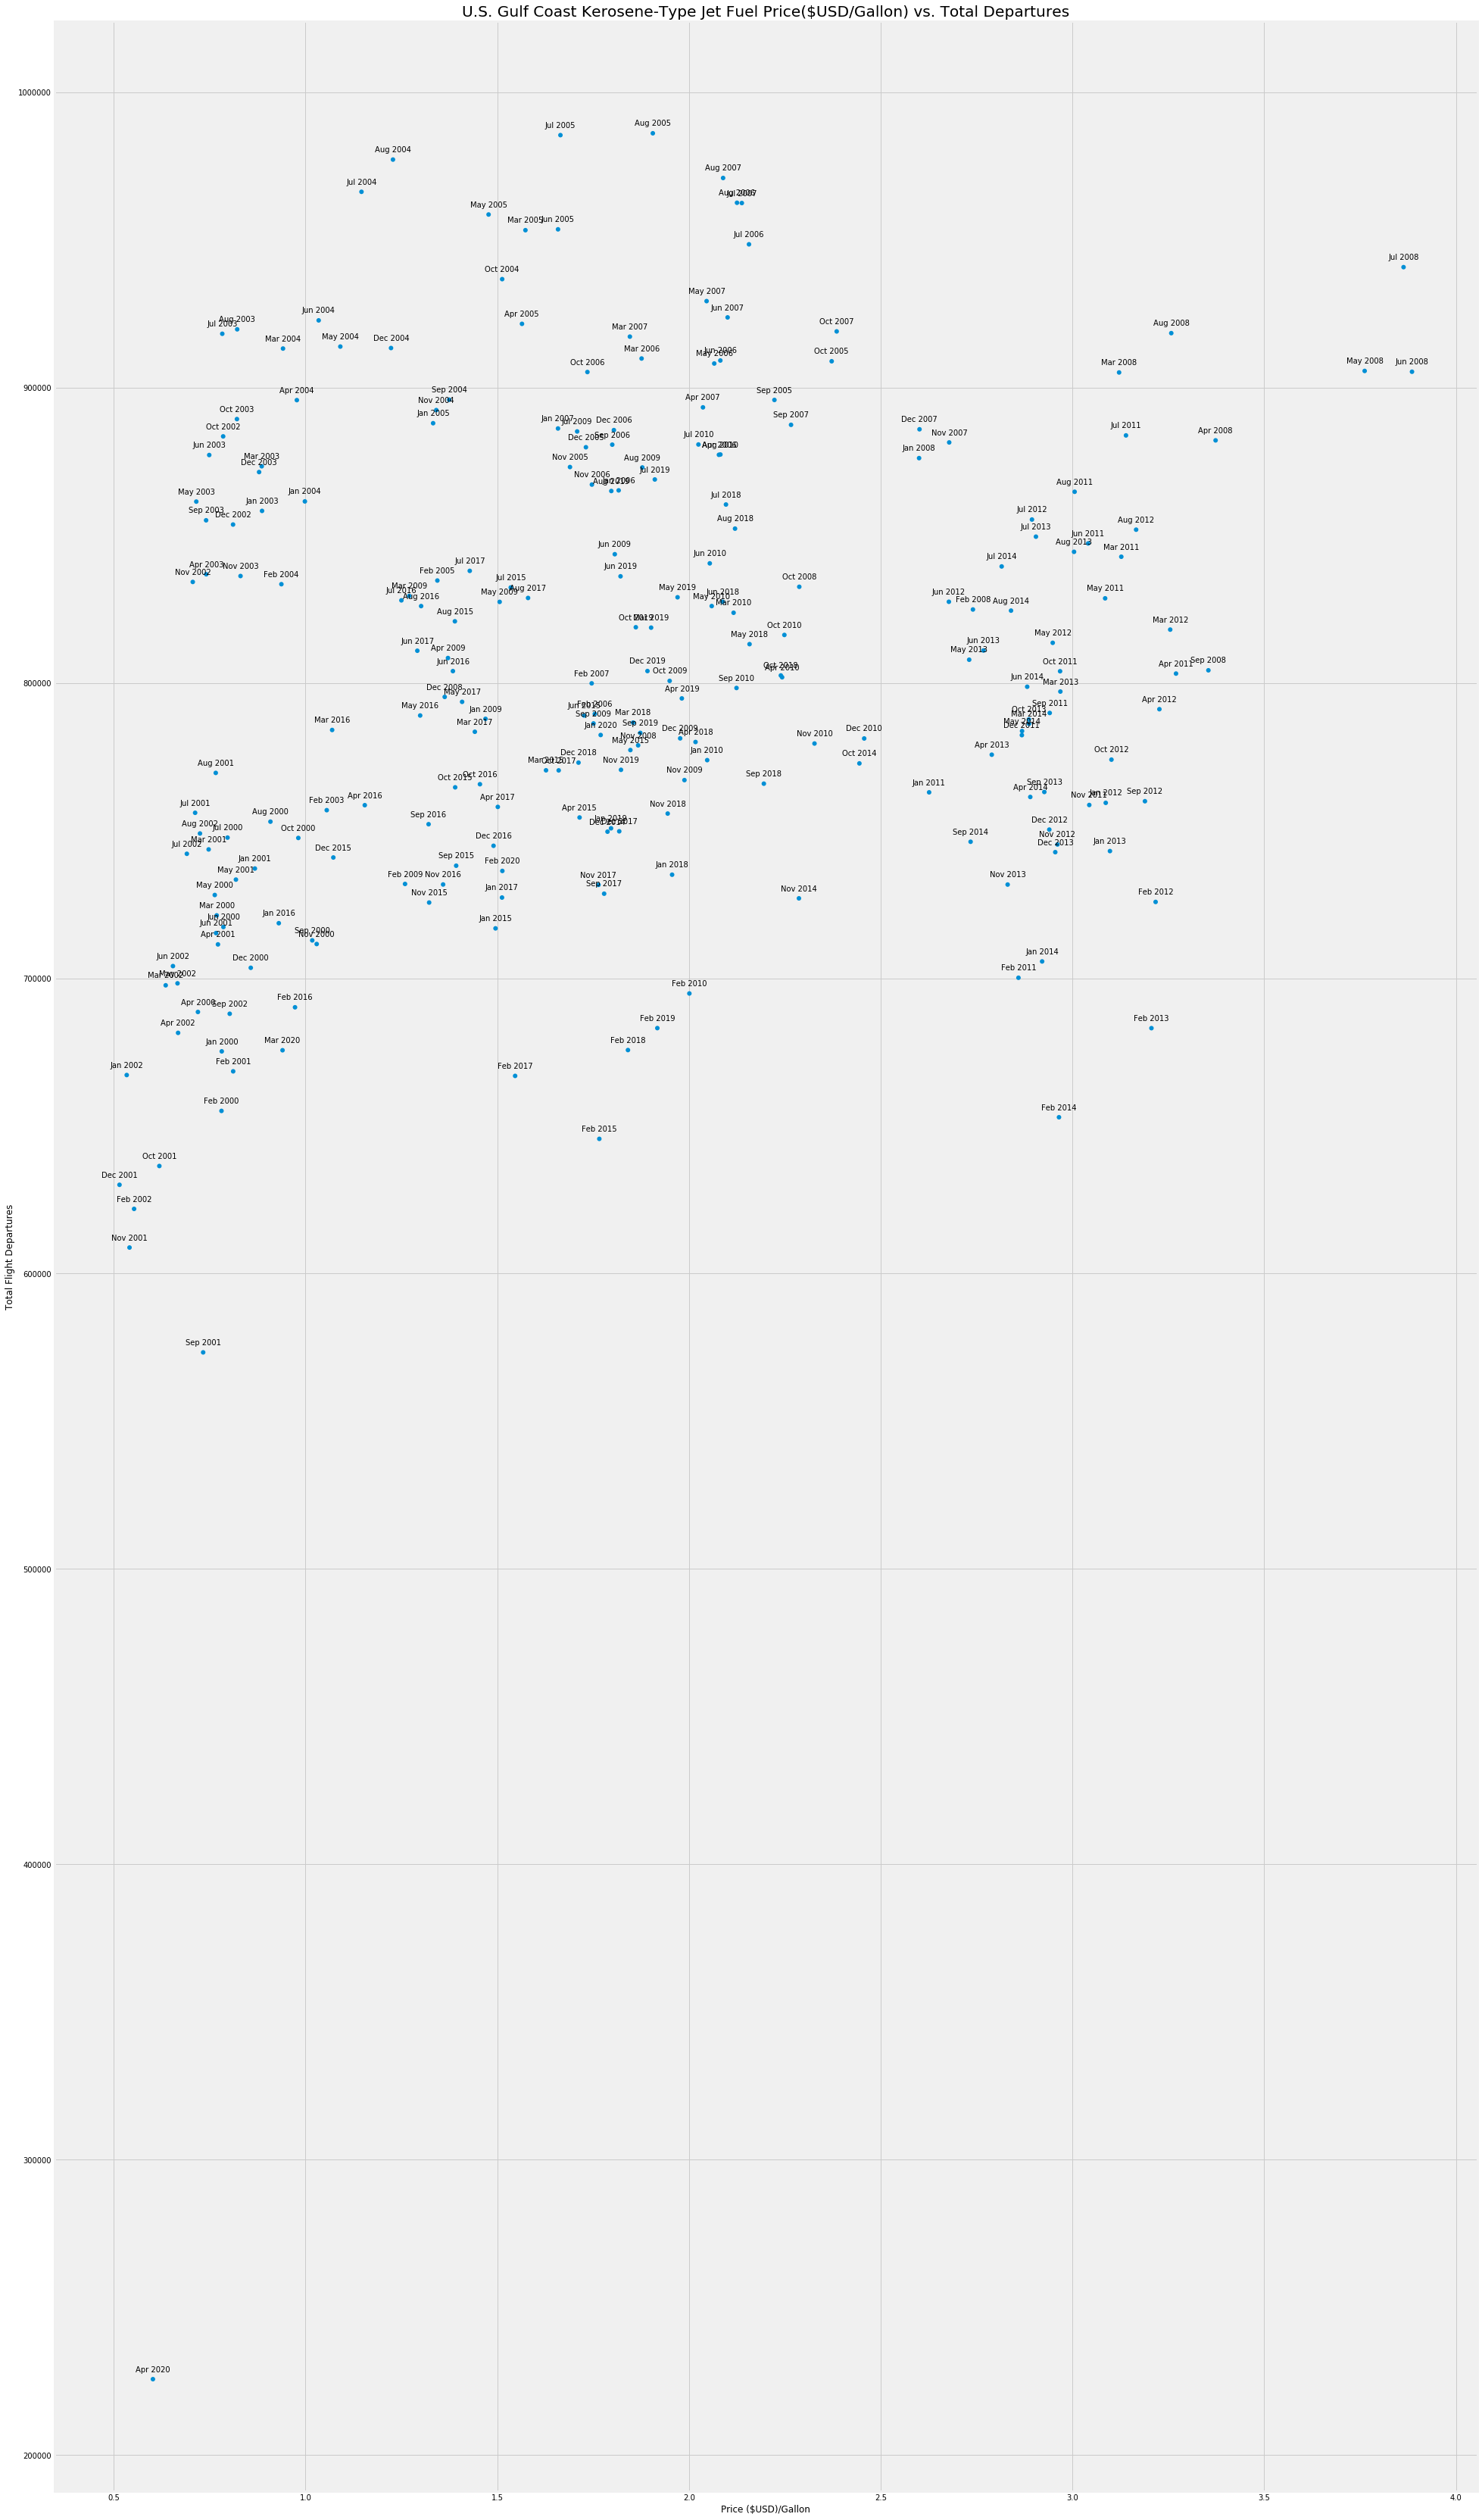

In [125]:
# SCATTER PLOT:
fig, ax = plt.subplots(figsize=(30,60))
ax.scatter(x=flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'],
           y=flight_and_fuel['TOTAL'], edgecolors='none')

for x,y,date in zip(flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'], 
              flight_and_fuel['TOTAL'], flight_and_fuel['ABRV']):
    
    label = "{}".format(date)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.style.use('fivethirtyeight')
plt.title('U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total Departures')
plt.xlabel('Price ($USD)/Gallon')
plt.ylabel('Total Flight Departures')
plt.savefig('us-jet-prices-vs-total-departures.png', dpi=100, bbox_inches='tight')

Both jet-fuel prices and flight-departure have not been so low since 9/11. Can see a slight negative correlation.

In [126]:
# INTERACTIVE CHART:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [127]:
# data = [go.Scatter(x=flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'],
#            y=flight_and_fuel['TOTAL'], mode='markers', marker=dict(
#                         size=12,
#                         line = {'width':2} #line of marker
#                     ),textposition='top center')]

# layout = go.Layout(title='U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total Departures',
#                     xaxis=dict(title='Price ($USD)/Gallon'),
#                    yaxis=dict(title='Total Flight Departures'),
#                    hovermode='closest')

# fig = go.Figure(data=data,layout=layout)
# pyo.plot(fig, filename='jet-vs-tot-departures.html')

In [128]:
# MORE DESCRIPTIVE:
flight_and_fuel_desc = flight_and_fuel.copy()
flight_and_fuel_desc.rename(columns={'TOTAL': 'Total (Domestic and International) Flights Departed'}, inplace=True)
flight_and_fuel_desc

,Total(DOM),Total(INTL),Total (Domestic and International) Flights Departed,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,ABRV
January 2000,623794,51459,675253.0,0.781650,2000,January,Jan 2000
February 2000,605936,49157,655093.0,0.780950,2000,February,Feb 2000
March 2000,667027,54263,721290.0,0.768500,2000,March,Mar 2000
April 2000,635767,52826,688593.0,0.719500,2000,April,Apr 2000
May 2000,672835,55358,728193.0,0.763409,2000,May,May 2000
...,...,...,...,...,...,...,...
December 2019,729109,74909,804018.0,1.891773,2019,December,Dec 2019
January 2020,708984,73377,782361.0,1.769727,2020,January,Jan 2020
February 2020,668537,67801,736338.0,1.513350,2020,February,Feb 2020
March 2020,621760,53870,675630.0,0.940130,2020,March,Mar 2020


In [129]:
#TOTAL DEPARTURES INTERACTIVE:
fig = px.scatter(flight_and_fuel_desc, x='U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon',
                 y='Total (Domestic and International) Flights Departed', hover_name='ABRV', title='U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total Departures',
                color='YEAR')
fig.update_layout(
    title="U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total, Domestic, International Flight Departures",
    xaxis_title="U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon ($USD/Gallon)",
    yaxis_title="Number of flight departures",
    legend_title="Filter by year",
    font=dict(
        family="Courier New, monospace",
        size=12
    )
)
fig.show()
#TO WRITE TO HTML: fig.write_html('US Gulf Coast Kerosene Jet Fuel Price vs. Flight Departures.html')

In [130]:
# COMPARE DOMESTIC, INTL, AND TOTAL FLIGHTS:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'],
    y=flight_and_fuel['TOTAL'],
    name="TOTAL FLIGHTS",       # this sets its legend entry
    mode='markers',
    text=flight_and_fuel['ABRV'], 
    hovertemplate='%{text} <br> KEROSENE JET FUEL PRICE: $%{x} <br> TOTAL FLIGHTS DEPARTED: %{y}',
))

fig2.add_trace(go.Scatter(
    x=flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'],
    y=flight_and_fuel['Total(DOM)'],
    name="DOMESTIC FLIGHTS",       # this sets its legend entry
    mode='markers',
    text=flight_and_fuel['ABRV'], 
    hovertemplate='%{text} <br> KEROSENE JET FUEL PRICE: $%{x} <br> TOTAL FLIGHTS DEPARTED: %{y}',
))

fig2.add_trace(go.Scatter(
    x=flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'],
    y=flight_and_fuel['Total(INTL)'],
    name="INTL FLIGHTS",       # this sets its legend entry
    mode='markers',
    text=flight_and_fuel['ABRV'], 
    hovertemplate='%{text} <br> KEROSENE JET FUEL PRICE: $%{x} <br> TOTAL FLIGHTS DEPARTED: %{y}'
))


fig2.update_layout(
    title="U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total, Domestic, International Flight Departures",
    xaxis_title="U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon ($USD/Gallon)",
    yaxis_title="Number of flight departures",
    legend_title="Type of Flights",
    font=dict(
        family="Courier New, monospace",
        size=12
    )
)

fig2.show()
fig2.write_html('US Gulf Coast Kerosene Jet Fuel Price vs. Flight Departures')

In [131]:
## REFRESHER ON DF TIME CLEANED DATA
df_time['YEAR'] = df_time['Date'].astype(str).str[:4]
df_time['MONTH'] = df_time['Date'].astype(str).str[5:7]
month_lookup = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
                '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October',
                '11': 'November','12': 'December'}
df_time['MONTH'] = df_time['MONTH'].apply(lambda x: month_lookup[x])
df_time

,Date,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH
0,2004-08-22 20:00:00-04:00,1.250,2004,August
1,2004-08-05 20:00:00-04:00,1.207,2004,August
2,2004-08-01 20:00:00-04:00,1.208,2004,August
3,2004-07-28 20:00:00-04:00,1.190,2004,July
4,2004-07-14 20:00:00-04:00,1.128,2004,July
...,...,...,...,...
7621,2012-09-05 20:00:00-04:00,3.218,2012,September
7622,2012-08-26 20:00:00-04:00,3.225,2012,August
7623,2012-08-19 20:00:00-04:00,3.162,2012,August
7624,2012-08-16 20:00:00-04:00,3.163,2012,August


In [132]:
# FUEL PRICES BY YEAR
fig3 = px.scatter(df_time, x='Date',
                 y='U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon', title='U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total Departures',
                color='YEAR')

fig3.show()

In [133]:
# FUEL PRICES BY MONTH:
fig4 = px.scatter(df_time, x='Date',
                 y='U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon', title='U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total Departures',
                color='MONTH')

fig4.show()

In [134]:
# INVESTIGATING FUEL TRENDS BY YEAR:
flight_and_fuel_2019 = flight_and_fuel[flight_and_fuel['YEAR'].astype(int) >= 2015]

In [135]:
flight_and_fuel['Total(DOM)'] = flight_and_fuel['Total(DOM)'].astype(int)
flight_and_fuel['Total(INTL)'] = flight_and_fuel['Total(INTL)'].astype(int)

In [136]:
flight_and_fuel.corr()

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
Total(DOM),1.000000,0.609929,0.996366,0.190845
Total(INTL),0.609929,1.000000,0.675211,0.532807
TOTAL,0.996366,0.675211,1.000000,0.234909
U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,0.190845,0.532807,0.234909,1.000000


In [137]:
flight_and_fuel_2019.corr()

,TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
TOTAL,1.000000,0.467518
U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,0.467518,1.000000


In [138]:
flight_and_fuel_2019.drop(['April 2020'])

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,ABRV
January 2015,643318,73576,716894.0,1.495550,2015,January,Jan 2015
February 2015,579701,65931,645632.0,1.766211,2015,February,Feb 2015
March 2015,694014,76396,770410.0,1.627217,2015,March,Mar 2015
April 2015,680243,74193,754436.0,1.714714,2015,April,Apr 2015
May 2015,702404,74859,777263.0,1.847250,2015,May,May 2015
...,...,...,...,...,...,...,...
November 2019,703803,66770,770573.0,1.822700,2019,November,Nov 2019
December 2019,729109,74909,804018.0,1.891773,2019,December,Dec 2019
January 2020,708984,73377,782361.0,1.769727,2020,January,Jan 2020
February 2020,668537,67801,736338.0,1.513350,2020,February,Feb 2020


In [139]:
flight_and_fuel_2019.corr()

,TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
TOTAL,1.000000,0.467518
U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,0.467518,1.000000


In [140]:
flight_and_fuel_old = flight_and_fuel[flight_and_fuel['YEAR'].astype(int) == 2002]

In [141]:
flight_and_fuel_old.corr()

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
Total(DOM),1.000000,0.881549,0.999624,0.713383
Total(INTL),0.881549,1.000000,0.894161,0.694335
TOTAL,0.999624,0.894161,1.000000,0.716916
U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,0.713383,0.694335,0.716916,1.000000


In [142]:
flight_and_fuel_old = flight_and_fuel[(flight_and_fuel['YEAR'].astype(int) == 2002) | (flight_and_fuel['YEAR'].astype(int) == 2001)]

In [143]:
flight_and_fuel_old.drop(['January 2001', 'February 2001', 'March 2001',
                         'April 2001', 'May 2001', "June 2001", "July 2001", 
                         "August 2001"])

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,ABRV
September 2001,527879,45463,573342.0,0.733150,2001,September,Sep 2001
October 2001,588541,47896,636437.0,0.618913,2001,October,Oct 2001
November 2001,563151,45683,608834.0,0.541105,2001,November,Nov 2001
December 2001,581089,48989,630078.0,0.515000,2001,December,Dec 2001
January 2002,616951,50285,667236.0,0.533818,2002,January,Jan 2002
February 2002,575447,46476,621923.0,0.553053,2002,February,Feb 2002
March 2002,644344,53272,697616.0,0.635450,2002,March,Mar 2002
April 2002,629919,51596,681515.0,0.667773,2002,April,Apr 2002
May 2002,644665,53619,698284.0,0.666286,2002,May,May 2002
June 2002,649321,54800,704121.0,0.654381,2002,June,Jun 2002


In [144]:
flight_and_fuel_old.corr()

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
Total(DOM),1.000000,0.837948,0.999224,0.529569
Total(INTL),0.837948,1.000000,0.858798,0.667863
TOTAL,0.999224,0.858798,1.000000,0.545336
U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,0.529569,0.667863,0.545336,1.000000


In [146]:
df

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,DAY,MONTH YEAR
0,1.250,2004,August,22,August 2004
1,1.207,2004,August,05,August 2004
2,1.208,2004,August,01,August 2004
3,1.190,2004,July,28,July 2004
4,1.128,2004,July,14,July 2004
...,...,...,...,...,...
7621,3.218,2012,September,05,September 2012
7622,3.225,2012,August,26,August 2012
7623,3.162,2012,August,19,August 2012
7624,3.163,2012,August,16,August 2012


In [149]:
# PRODUCING MORE ACCURATE POINTS BY NOT USING MEAN
combined_flight_work = flight_and_fuel.copy()

In [151]:
combined_flight_work['MONTH YEAR'] = combined_flight_work.index

In [156]:
df2 = pd.merge(df, combined_flight_work, how='outer', on=['MONTH YEAR'])

In [158]:
df2 = df2[df2['TOTAL'].notna()]

In [159]:
df2['Total(DOM)'] = df2['Total(DOM)'].astype(int)
df2['Total(INTL)'] = df2['Total(INTL)'].astype(int)

In [160]:
df2.corr()

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon_x,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon_y
U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon_x,1.000000,0.192830,0.528488,0.236369,0.994533
Total(DOM),0.192830,1.000000,0.611911,0.996360,0.193890
Total(INTL),0.528488,0.611911,1.000000,0.677104,0.531393
TOTAL,0.236369,0.996360,0.677104,1.000000,0.237669
U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon_y,0.994533,0.193890,0.531393,0.237669,1.000000


In [ ]:
flight_and_fuel_old = flight_and_fuel[flight_and_fuel['YEAR'].astype(int) == 2002]
flight_and_fuel_old.corr()

In [ ]:
df2_old = df2[(df2['YEAR'].astype(int) == 2002)]

In [ ]:
df2_old.corr()

In [ ]:
df2_old.drop(['January 2001', 'February 2001', 'March 2001',
                         'April 2001', 'May 2001', "June 2001", "July 2001", 
                         "August 2001", "September 2002", "October 2002", "November 2002",
             "December 2002"])

In [ ]:
df2_old.corr()

In [ ]:
df2_old.set_index(['MONTH YEAR'], inplace=True)

In [ ]:
df2_new = df2[(df2['YEAR'].astype(int) == 2018) | (df2['YEAR'].astype(int) == 2019)]

In [ ]:
df2_new.corr()

In [ ]:
df2_new.corr()

In [166]:
# EXPORT DATA SET FOR TABLEAU WORK
combined_export = combined_flight_work.copy()

In [174]:
# CHANGE TO TIME FOR TIME SERIES
combined_export['MONTH YEAR'] = pd.to_datetime(combined_export['MONTH YEAR'])

In [175]:
combined_export.to_csv('combined_kerosene_and_flightdept.csv', sep=';')

In [176]:
combined_export

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,ABRV,MONTH YEAR
January 2000,623794,51459,675253.0,0.781650,2000,January,Jan 2000,2000-01-01
February 2000,605936,49157,655093.0,0.780950,2000,February,Feb 2000,2000-02-01
March 2000,667027,54263,721290.0,0.768500,2000,March,Mar 2000,2000-03-01
April 2000,635767,52826,688593.0,0.719500,2000,April,Apr 2000,2000-04-01
May 2000,672835,55358,728193.0,0.763409,2000,May,May 2000,2000-05-01
...,...,...,...,...,...,...,...,...
December 2019,729109,74909,804018.0,1.891773,2019,December,Dec 2019,2019-12-01
January 2020,708984,73377,782361.0,1.769727,2020,January,Jan 2020,2020-01-01
February 2020,668537,67801,736338.0,1.513350,2020,February,Feb 2020,2020-02-01
March 2020,621760,53870,675630.0,0.940130,2020,March,Mar 2020,2020-03-01


# Exploratory Data Analysis

In [268]:
sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})

columns = ["Date", "Total Flights", "Domestic Flights", "International Flights"]
data_pre = pd.DataFrame({    
    'Date': combined_export['MONTH YEAR'],
    'Total Flights': combined_export['TOTAL'],
    'Kerosene Fuel Prices': combined_export['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon']
})


Text(0.5, 1.0, 'Time analysis total flight departures and kerosene jet prices')

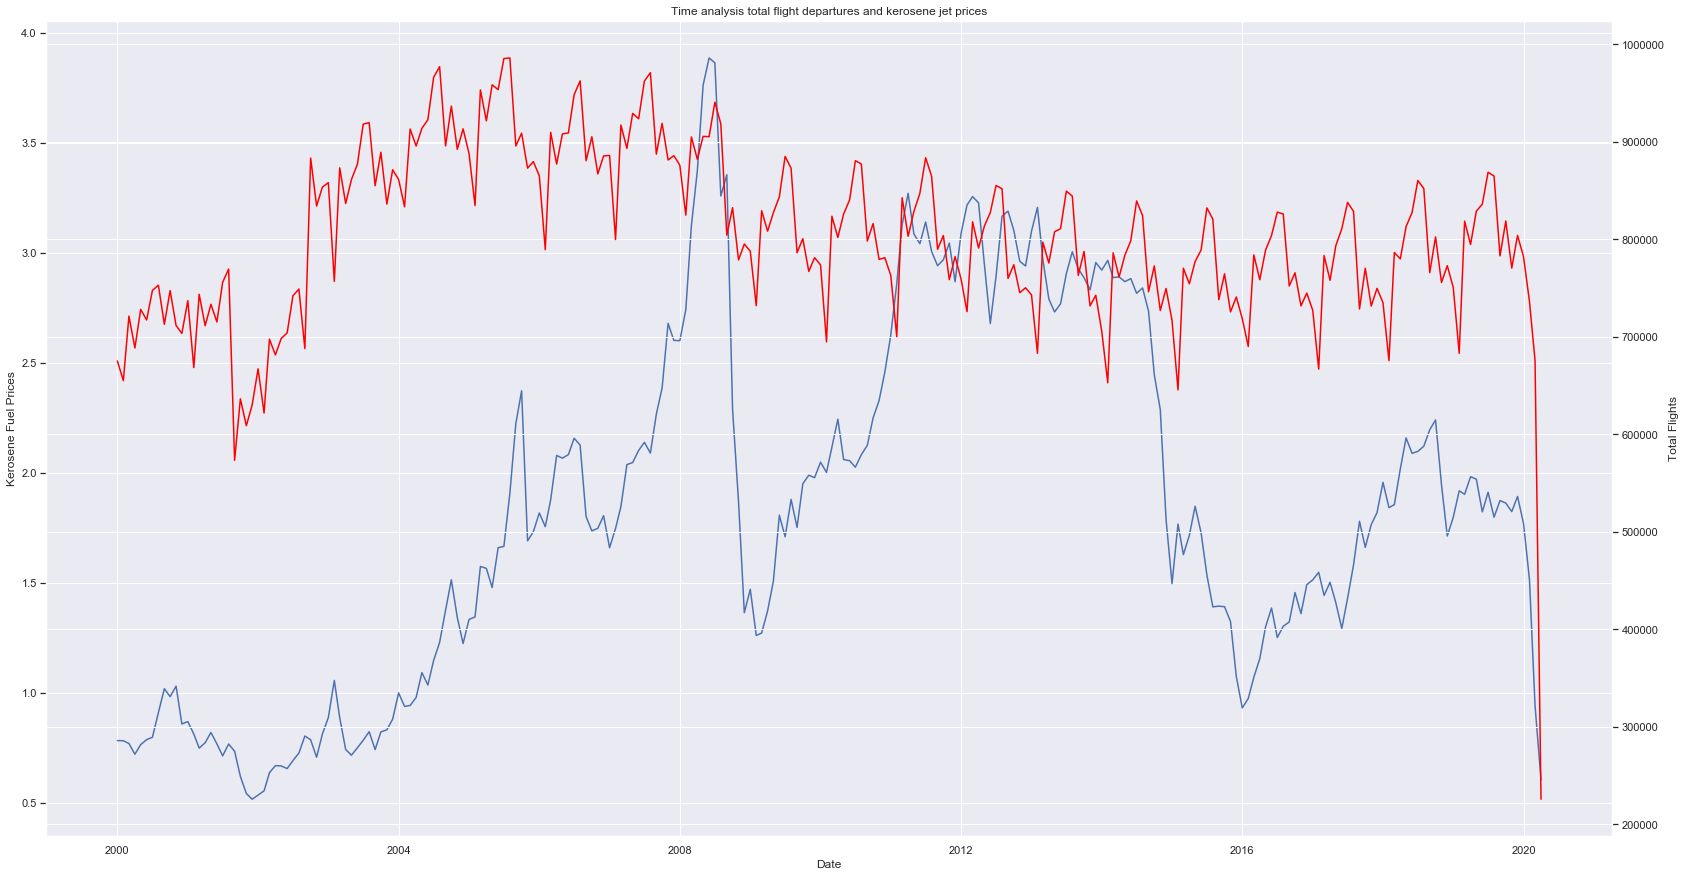

In [274]:
ax = sns.lineplot(x='Date', y='Kerosene Fuel Prices', data=data_pre)
ax2 = ax.twinx()
ax2 = sns.lineplot(x='Date', y='Total Flights', color='red', data=data_pre)

plt.title("Time analysis total flight departures and kerosene jet prices")

Generally seems to have a slight correlation in the sense that while one variable increases, the other does as well, although to a different scale. Flight patterns are obviously affected by seasonanility starting in 2004. Both drop drastically in two years 2002 and 2020.

In [278]:
fig_1 = ax.get_figure()

In [282]:
fig_1.savefig("time-flight-keroseneprice.png")